In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [5]:
df1 = pd.read_csv("/Users/benboda/Downloads/GitHub/Real_Estate_Price_Prediction_Project/Data/Bengaluru_House_Data.csv")
df1.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df1.shape

(13320, 9)

In [7]:
df1.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
df2 = df1.drop(["area_type", "society", "balcony", "availability"], axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3.shape

(13246, 5)

In [12]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df3["bhk"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))
df3.head()

/var/folders/cy/s1k4j6l914d21jjt3m5tg1t80000gn/T/ipykernel_38639/1418285638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df3["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [15]:
df3[df3["bhk"] > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [16]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df3[~df3["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [19]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return ((float(tokens[0]) + float(tokens[1])) / 2)
    try:
        return float(x)
    except:
        return None

In [20]:
print(convert_sqft_to_num("2166"))
print(convert_sqft_to_num("2166 - 2400"))
print(convert_sqft_to_num("2166 - 2400 - 2500"))
print(convert_sqft_to_num("34.46sq. meter"))

2166.0
2283.0
None
None


In [21]:
df4 = df3.copy()
df4["total_sqft"] = df4["total_sqft"].apply(convert_sqft_to_num)
df4.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [22]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [23]:
(2100 + 2850) / 2

2475.0

In [24]:
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [25]:
df5 = df4.copy()
df5["price"] = df5["price"] * .011 # current conversion rate from Rupees to USD
df5["price_per_sqft"] = df5["price"] * 100000 / df5["total_sqft"]
df5.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,0.42977,2,40.697917
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,1.32000,4,50.769231
2,Uttarahalli,3 BHK,1440.0,2.0,0.68200,3,47.361111
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.04500,3,68.704799
4,Kothanur,2 BHK,1200.0,2.0,0.56100,2,46.750000


In [26]:
len(df5["location"].unique())

1304

In [27]:
df5["location"] = df5["location"].apply(lambda x: x.strip())

location_stats = df5.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [28]:
locations_less_than_10 = location_stats[location_stats <= 10]

In [29]:
df5["location"] = df5["location"].apply(lambda x: "other" if x in locations_less_than_10 else x)

In [30]:
len(df5["location"].unique())

242

In [31]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,0.42977,2,40.697917
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,1.32000,4,50.769231
2,Uttarahalli,3 BHK,1440.0,2.0,0.68200,3,47.361111
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.04500,3,68.704799
4,Kothanur,2 BHK,1200.0,2.0,0.56100,2,46.750000
5,Whitefield,2 BHK,1170.0,2.0,0.41800,2,35.726496
6,Old Airport Road,4 BHK,2732.0,4.0,2.24400,4,82.137628
7,Rajaji Nagar,4 BHK,3300.0,4.0,6.60000,4,200.000000
8,Marathahalli,3 BHK,1310.0,3.0,0.69575,3,53.110687
9,other,6 Bedroom,1020.0,6.0,4.07000,6,399.019608


In [32]:
df5[df5["total_sqft"] / df5["bhk"] < 300].head() # There are generally at least 300 sqft per bedroom

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,4.070,6,399.019608
45,HSR Layout,8 Bedroom,600.0,9.0,2.200,8,366.666667
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.650,6,117.270789
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.935,8,69.259259
70,other,3 Bedroom,500.0,3.0,1.100,3,220.000000


In [33]:
df5.shape

(13246, 7)

In [34]:
df6 = df5[~(df5["total_sqft"] / df5["bhk"] < 300)]
df6.head()
df6.shape

(12502, 7)

In [35]:
df6["price_per_sqft"].describe()

count    12456.000000
mean        69.393531
std         45.849401
min          2.946128
25%         46.315789
50%         58.235294
75%         76.083333
max       1941.176471
Name: price_per_sqft, dtype: float64

In [36]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,0.42977,2,40.697917
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,1.32000,4,50.769231
2,Uttarahalli,3 BHK,1440.0,2.0,0.68200,3,47.361111
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.04500,3,68.704799
4,Kothanur,2 BHK,1200.0,2.0,0.56100,2,46.750000


In [37]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf["price_per_sqft"])
        std = np.std(subdf["price_per_sqft"])
        cleaned_df = subdf[(subdf["price_per_sqft"] >= (m - std)) & (subdf["price_per_sqft"] <= (m + std))]
        df_out = pd.concat([df_out, cleaned_df], ignore_index=True)
    return df_out

In [38]:
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [39]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df["location"] == location) & (df["bhk"] == 2)]
    bhk3 = df[(df["location"] == location) & (df["bhk"] == 3)]
    matplotlib.rcParams["figure.figsize"] = (15, 10)
    plt.scatter(bhk2["total_sqft"], bhk2["price"], marker="x", color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3["total_sqft"], bhk3["price"], marker="+", color='green', label='3 BHK', s=50)
    plt.xlabel("Total Area in Square Feet")
    plt.ylabel("Price (USD)")
    plt.title(location)
    plt.legend()

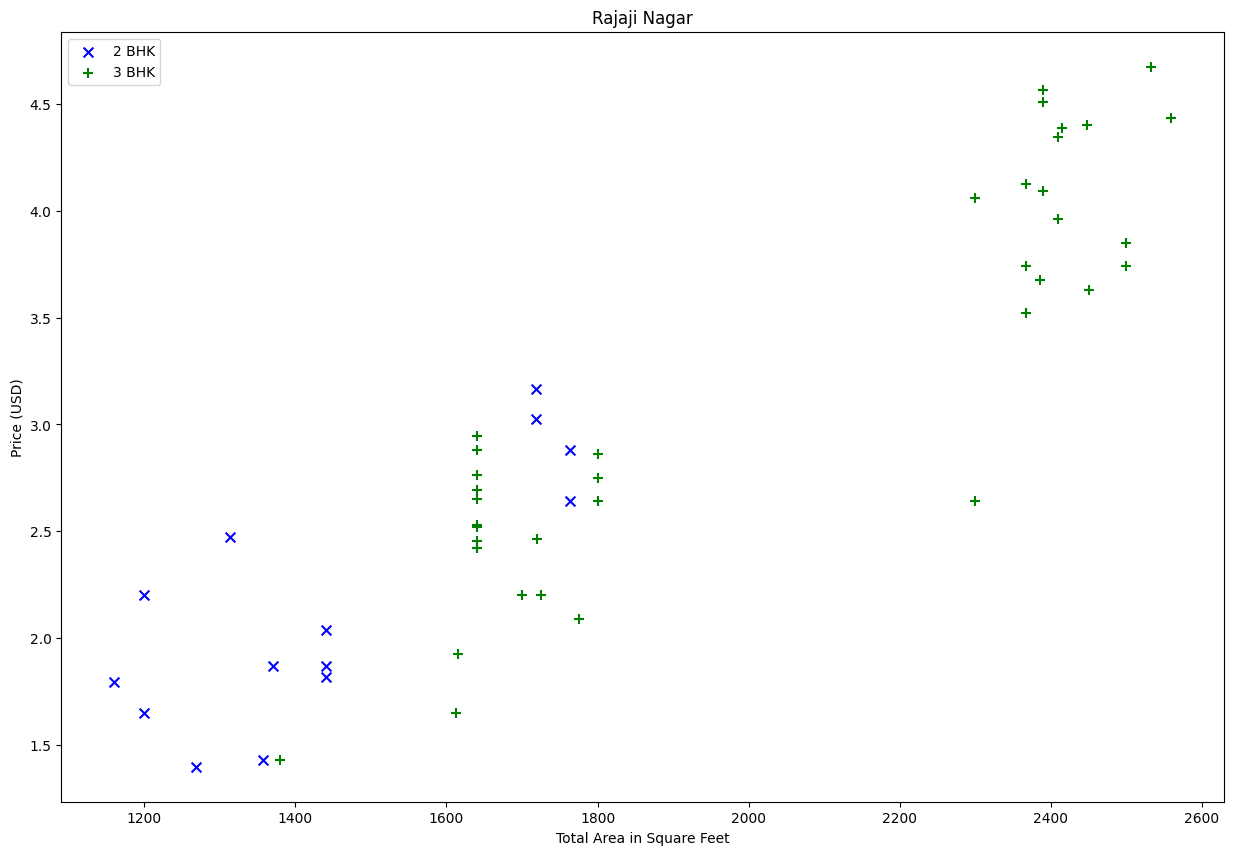

In [40]:
plot_scatter_chart(df7, "Rajaji Nagar")

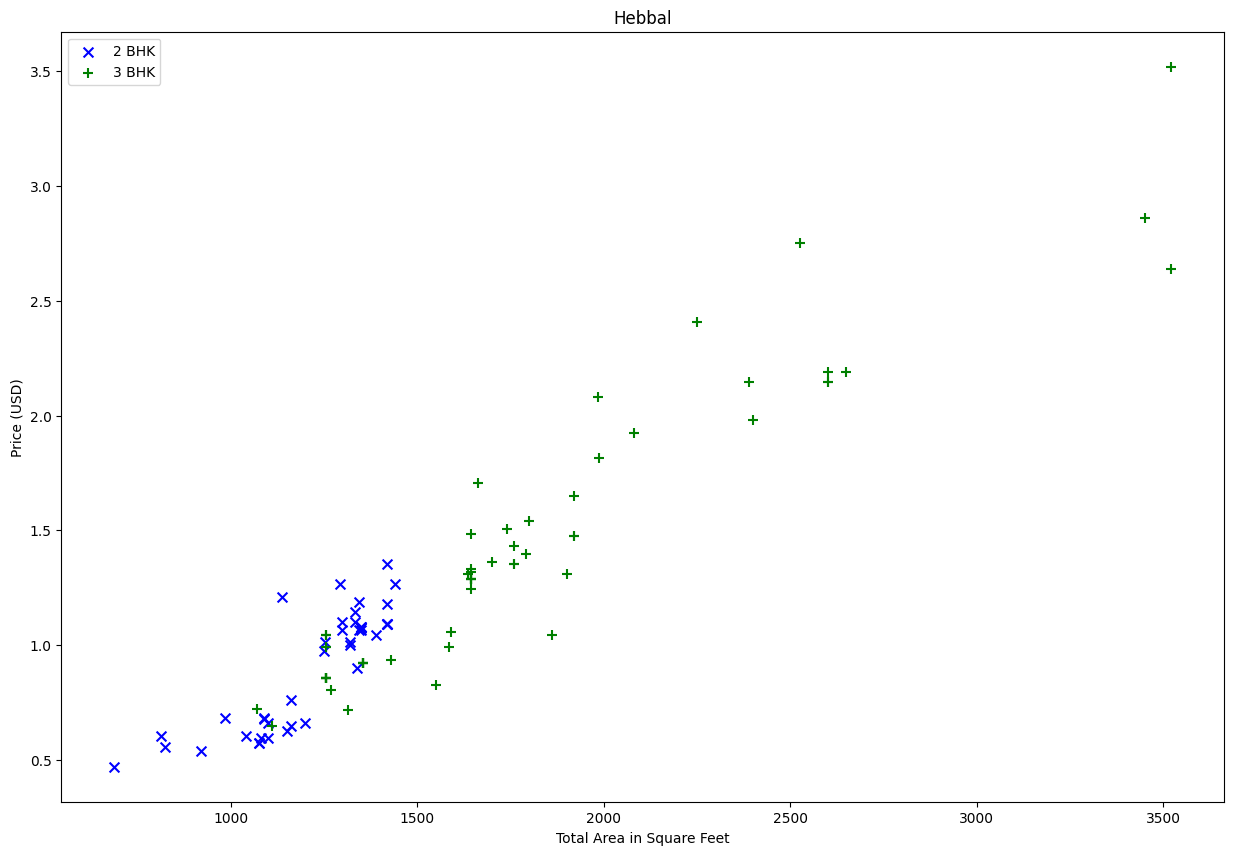

In [41]:
plot_scatter_chart(df7, "Hebbal")

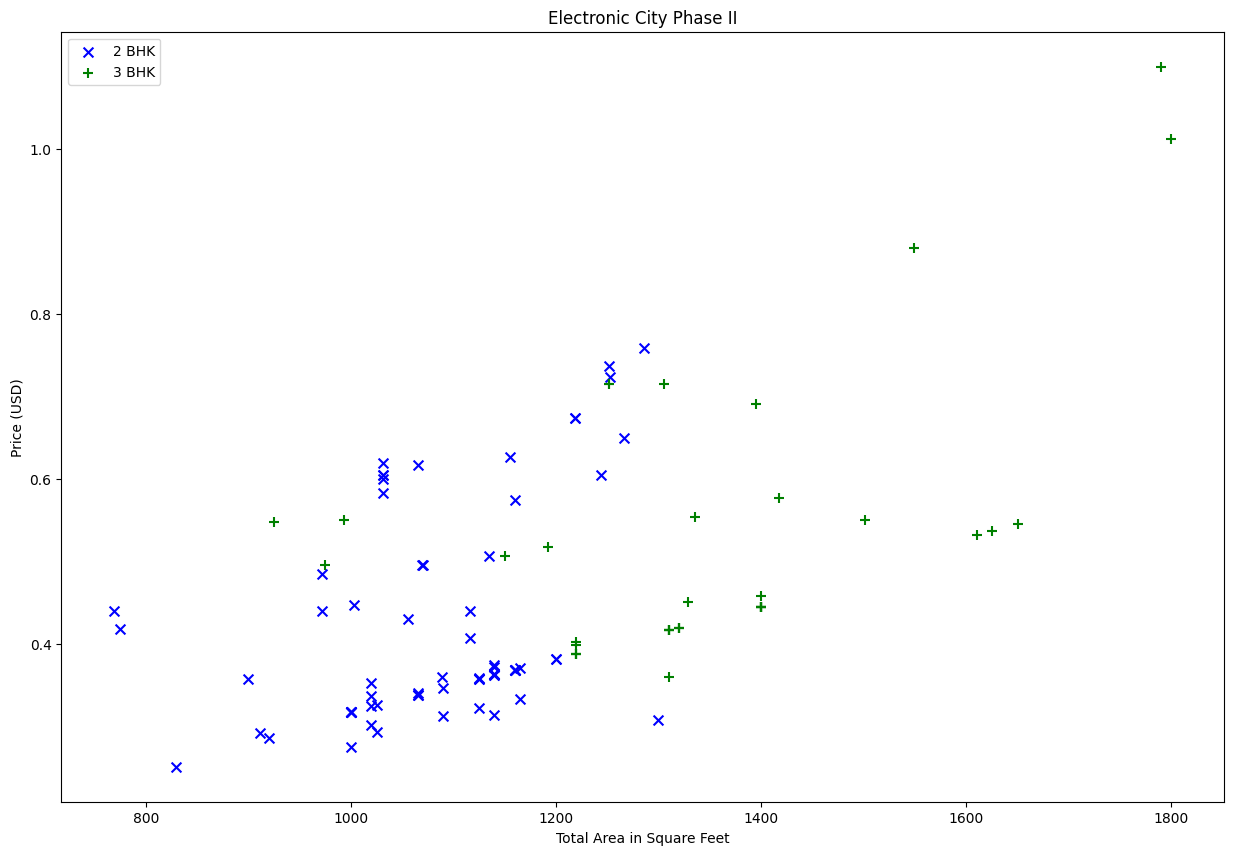

In [42]:
plot_scatter_chart(df7, "Electronic City Phase II")

In [ ]:
# left off here